# Unit 5 - Financial Planning

In [30]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
# Load .env environment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [32]:
# Set current amount of crypto assets
crypto_assets = { "my_btc": 1.2, "my_eth": 5.3}

In [33]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [34]:
# Fetch current BTC price
my_btc_response = requests.get(btc_url)
# Fetch current ETH price
my_eth_response = requests.get(eth_url)
# Compute current value of my crypto
my_btc_value = my_btc_response.json()["data"]['1']["quotes"]["USD"]["price"] * crypto_assets["my_btc"]
my_eth_value = my_eth_response.json()["data"]['1027']["quotes"]["USD"]["price"] * crypto_assets["my_eth"]
# Print current crypto wallet balance
print(f"The current value of your {crypto_assets['my_btc']} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {crypto_assets['my_eth']} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43353.60
The current value of your 5.3 ETH is $12702.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [36]:
# Set Alpaca API key and secret
api_key = os.getenv("ALPACA_API_KEY")
# Create the Alpaca API object
api_secret = os.getenv("ALPACA_SECRET_KEY")

In [38]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-05-26" , tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-01-20" , tz="America/New_York").isoformat()
# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

alpaca_call  = tradeapi.REST( api_key , api_secret , api_version="v2" )

df_stock_market = alpaca_call.get_barset ( 
    tickers,
    timeframe , 
    start = start_date ,
    end = end_date ,
    limit =1000
).df

#Drop NA from the DataFrame 
df_stock_market = df_stock_market.dropna()
# Preview DataFrame
df_stock_market

AGG                                         SPY  \
                             open     high     low   close     volume    open   
time                                                                            
2019-05-28 00:00:00-04:00  109.57  109.650  109.50  109.58  4744701.0  283.09   
2019-05-29 00:00:00-04:00  109.73  109.850  109.60  109.61  5186962.0  278.91   
2019-05-30 00:00:00-04:00  109.77  109.940  109.65  109.89  3051986.0  279.11   
2019-05-31 00:00:00-04:00  110.01  110.640  110.00  110.37  6713517.0  276.21   
2019-06-04 00:00:00-04:00  110.28  110.380  108.85  110.30  4704680.0  277.12   
...                           ...      ...     ...     ...        ...     ...   
2022-01-13 00:00:00-05:00  112.60  112.800  112.51  112.80  7925476.0  472.21   
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916.0  461.19   
2022-01-18 00:00:00-05:00  111.81  111.860  111.47  111.49  7390142.0  459.73   
2022-01-19 00:00:00-05:00  111.70  111.890  111.65  111.71  7641972.0  458.17   
2022-01-20 00:00:00-05:00  111.84  111.900  111.75  111.79  6861797.0  453.75   

                                                                 
                               high      low   close     volume  
time                                                             
2019-05-28 00:00:00-04:00  284.1500  280.180  280.31   57121638  
2019-05-29 00:00:00-04:00  279.3600  276.710  278.38   88121995  
2019-05-30 00:00:00-04:00  280.0400  277.805  279.05   52483275  
2019-05-31 00:00:00-04:00  277.1200  275.240  275.37   67316713  
2019-06-04 00:00:00-04:00  280.6800  276.620  280.52   64337734  
...                             ...      ...     ...        ...  
2022-01-13 00:00:00-05:00  472.8800  463.440  464.54   79071832  
2022-01-14 00:00:00-05:00  465.0900  459.900  464.68   84363989  
2022-01-18 00:00:00-05:00  459.9600  455.310  456.53   95565773  
2022-01-19 00:00:00-05:00  459.6124  451.460  451.79   95311817  
2022-01-20 00:00:00-05:00  458.7400  444.500  446.79  105009751  

[669 rows x 10 columns]

In [39]:
# Pick AGG and SPY close prices
agg_close_price = df_stock_market['AGG']["close"][0]
spy_close_price = df_stock_market['SPY']['close'][0]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.58
Current SPY closing price: $280.31


In [40]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14015.50
The current value of your 200 AGG shares is $21916.00


### Savings Health Analysis

In [41]:
# Set monthly household income
monthly_income = 12000
# Consolidate financial assets data
consolidted_assets = [ my_btc_value+my_eth_value] , [ my_agg_value+my_spy_value]
# Create savings DataFrame
df_savings = pd.DataFrame(data = consolidted_assets , index = ['crypto', 'shares'] )
df_savings.columns=['amount']
df_savings

,amount
crypto,56055.845
shares,35931.500


<AxesSubplot:title={'center':'Composition of Assets'}, ylabel='Amount'>

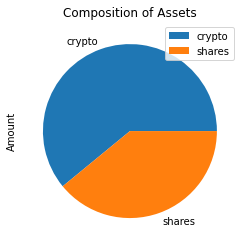

In [42]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount' , title= "Composition of Assets" , ylabel = 'Amount')

In [43]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
investments = df_savings.sum()
total_savings = monthly_income + investments[0]

#calculate remaning cash to get to the financial goal 
remaining = abs((total_savings - emergency_fund))

# Validate saving health
if total_savings > emergency_fund: 
    print('Congratulations you have enough cash for an emergency fun')
elif total_savings == emergency_fund:
    print('Congratulations yon reaching your financial goals')
else: 
    print(f'You are {remaining} $ short from reaching your financial goals')

Congratulations you have enough cash for an emergency fun


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [44]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-20', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-20', tz='America/New_York').isoformat()

In [45]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca_call.get_barset(
    tickers,
    timeframe ,
    start= start_date,
    end= end_date,
    limit=1000
).df
# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
time                                                                            
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.09  5729791.0     NaN   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.49  8569565.0  281.04   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.20  4266243.0  280.08   
2018-02-05 00:00:00-05:00  107.12  107.810  107.00  107.63  4879995.0  273.47   
2018-02-06 00:00:00-05:00  107.46  107.560  107.28  107.30  5489931.0  259.99   

                                                                
                             high     low   close       volume  
time                                                            
2018-01-31 00:00:00-05:00     NaN     NaN     NaN          NaN  
2018-02-01 00:00:00-05:00  283.06  280.68  281.60   64693558.0  
2018-02-02 00:00:00-05:00  280.23  275.41  275.52  121717871.0  
2018-02-05 00:00:00-05:00  275.85  263.31  264.18  205971586.0  
2018-02-06 00:00:00-05:00  269.70  254.12  269.18  232359323.0

In [46]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forecast_30_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [47]:
# Printing the simulation input data
MC_forecast_30_yr.portfolio_data

AGG                                      \
                             open     high     low   close     volume   
time                                                                    
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.09  5729791.0   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.49  8569565.0   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.20  4266243.0   
2018-02-05 00:00:00-05:00  107.12  107.810  107.00  107.63  4879995.0   
2018-02-06 00:00:00-05:00  107.46  107.560  107.28  107.30  5489931.0   
...                           ...      ...     ...     ...        ...   
2022-01-13 00:00:00-05:00  112.60  112.800  112.51  112.80  7925476.0   
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916.0   
2022-01-18 00:00:00-05:00  111.81  111.860  111.47  111.49  7390142.0   
2022-01-19 00:00:00-05:00  111.70  111.890  111.65  111.71  7641972.0   
2022-01-20 00:00:00-05:00  111.84  111.900  111.75  111.79  6861797.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2018-01-31 00:00:00-05:00          NaN     NaN       NaN     NaN     NaN   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.0600  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.2300  275.41  275.52   
2018-02-05 00:00:00-05:00     0.004011  273.47  275.8500  263.31  264.18   
2018-02-06 00:00:00-05:00    -0.003066  259.99  269.7000  254.12  269.18   
...                                ...     ...       ...     ...     ...   
2022-01-13 00:00:00-05:00     0.001776  472.21  472.8800  463.44  464.54   
2022-01-14 00:00:00-05:00    -0.005585  461.19  465.0900  459.90  464.68   
2022-01-18 00:00:00-05:00    -0.006062  459.73  459.9600  455.31  456.53   
2022-01-19 00:00:00-05:00     0.001973  458.17  459.6124  451.46  451.79   
2022-01-20 00:00:00-05:00     0.000716  453.75  458.7400  444.50  446.79   

                                                     
                                volume daily_return  
time                                                 
2018-01-31 00:00:00-05:00          NaN          NaN  
2018-02-01 00:00:00-05:00   64693558.0          NaN  
2018-02-02 00:00:00-05:00  121717871.0    -0.021591  
2018-02-05 00:00:00-05:00  205971586.0    -0.041159  
2018-02-06 00:00:00-05:00  232359323.0     0.018926  
...                                ...          ...  
2022-01-13 00:00:00-05:00   79071832.0    -0.013841  
2022-01-14 00:00:00-05:00   84363989.0     0.000301  
2022-01-18 00:00:00-05:00   95565773.0    -0.017539  
2022-01-19 00:00:00-05:00   95311817.0    -0.010383  
2022-01-20 00:00:00-05:00  105009751.0    -0.011067  

[1001 rows x 12 columns]

In [48]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_forecast_30_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jalhussain/ASU_Fintech/04_Api/Financial-Planning-Project/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000100,0.997234,1.018583,1.010059,1.013667,1.001236,1.010158,1.006571,1.011957,1.010020,...,1.008588,0.998485,0.995807,0.997605,1.008182,0.993610,0.993735,1.009522,1.000323,1.001524
2,0.995762,0.997725,1.013517,1.004809,1.026983,1.017466,1.015218,1.005458,1.029063,1.011300,...,1.009670,0.997978,1.007667,0.992990,1.017100,0.999579,1.005029,1.013404,1.007861,1.009736
3,0.993928,0.998793,0.995326,1.004068,1.034249,1.015547,1.017891,0.999263,1.043309,1.033628,...,0.997164,0.997086,0.989718,0.991640,1.005246,0.993813,0.995389,1.021014,1.005828,1.005630
4,0.995418,0.992092,0.997639,1.009135,1.030626,1.029392,1.020654,1.002693,1.033757,1.036638,...,1.006171,1.009363,0.991549,0.993739,1.010504,0.987641,0.993416,1.014179,1.008242,1.009685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,25.841145,18.038219,7.483686,19.004365,13.961106,11.852427,6.969740,6.870989,10.034218,102.580232,...,9.604071,20.010542,24.073424,37.499030,7.523212,4.155312,11.925760,9.484354,14.282394,15.309341
7557,25.761689,17.714553,7.450052,19.014486,13.906935,11.973783,7.034188,6.967391,10.031063,102.698498,...,9.569316,20.188194,24.104542,36.993785,7.511009,4.131204,11.820799,9.465269,14.212436,15.328018
7558,25.711610,17.718295,7.439600,18.944038,13.797048,12.035351,7.011187,6.901985,10.058351,102.160670,...,9.610216,20.289999,24.226491,36.330554,7.499107,4.164756,11.899361,9.456244,14.250720,15.271342
7559,25.895303,17.524024,7.414870,18.934179,13.888070,12.051053,7.028285,6.900638,10.194573,102.134948,...,9.623601,20.264990,24.194921,36.447849,7.582838,4.196976,11.876671,9.411862,14.010090,15.343370


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

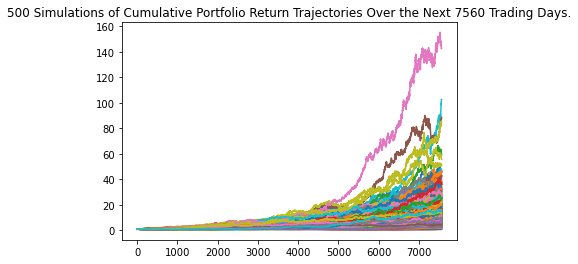

In [49]:
# Plot simulation outcomes
MC_forecast_30_yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

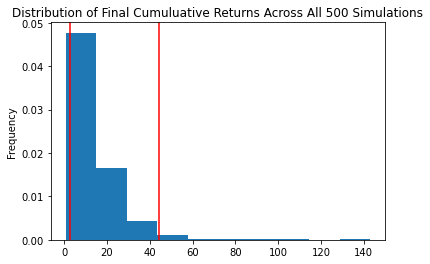

In [50]:
# Plot probability distribution and confidence intervals
MC_forecast_30_yr.plot_distribution()

### Retirement Analysis

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
forcast_30_summary = MC_forecast_30_yr.summarize_cumulative_return()
# Print summary statistics
forcast_30_summary

count           500.000000
mean             14.177714
std              12.898678
min               0.791301
25%               6.687775
50%              10.886970
75%              17.204416
max             142.933644
95% CI Lower      2.713716
95% CI Upper     44.241196
Name: 7560, dtype: float64

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [52]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower =round(forcast_30_summary[8] * initial_investment,2)
ci_upper =  round(forcast_30_summary[9] * initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $54274.31 and $884823.91


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(forcast_30_summary[8] * initial_investment,2)
ci_upper =  round(forcast_30_summary[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $81411.47 and $1327235.87


## Optional Challenge - Early Retirement




### Five Years Retirement Option

In [54]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forecast_5_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [55]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_forecast_5_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jalhussain/ASU_Fintech/04_Api/Financial-Planning-Project/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990607,0.992923,0.999732,0.998937,1.000997,0.998810,1.004618,0.998022,0.983630,1.006988,...,1.002166,0.990006,1.005726,1.002848,0.995296,0.987448,1.004148,1.010574,1.006973,0.995503
2,0.985020,0.993569,0.987604,1.002200,1.000091,1.002782,0.993644,0.991434,0.979244,1.007381,...,0.998373,0.993947,1.015165,1.000247,1.000283,0.978356,1.002409,1.002982,1.004517,0.983260
3,0.980268,0.998364,0.975697,1.004815,0.982196,0.998294,1.002853,0.988162,0.975653,1.005843,...,1.001640,0.986412,1.001705,1.009571,1.017268,0.975975,1.005097,1.001596,1.003372,0.969297
4,0.976725,0.989303,0.969973,1.017464,0.985010,1.008743,0.990878,0.994144,0.975806,1.005919,...,0.995021,0.987852,0.994680,1.005542,1.032188,0.966168,1.002508,0.992805,0.988576,0.962821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.146229,0.989847,1.450536,2.044302,1.287088,0.921751,1.353800,1.027098,2.684372,1.223943,...,1.191254,1.068923,1.357121,0.848471,0.910993,1.543465,2.258243,1.577709,1.375991,2.126475
1257,1.144724,0.988140,1.461146,2.034064,1.280342,0.925617,1.355405,1.042351,2.701095,1.229064,...,1.189564,1.071927,1.374957,0.853155,0.903548,1.525347,2.233496,1.583730,1.385716,2.129690
1258,1.143356,0.999521,1.453421,2.042000,1.273103,0.916517,1.370315,1.025850,2.662513,1.226016,...,1.176822,1.081055,1.366117,0.850332,0.902605,1.514159,2.213527,1.600405,1.380027,2.110598
1259,1.147716,0.991799,1.441117,2.036473,1.274141,0.907262,1.373123,1.018058,2.674572,1.219328,...,1.168161,1.080283,1.380556,0.853236,0.903381,1.517269,2.233457,1.590318,1.375129,2.128135


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

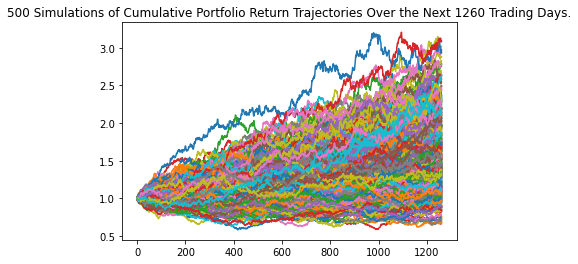

In [56]:
# Plot simulation outcomes
MC_forecast_5_yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

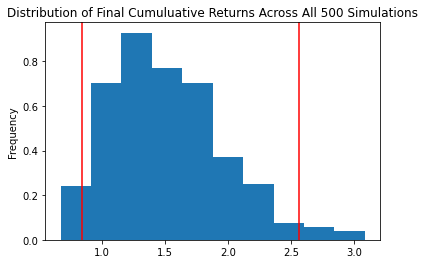

In [57]:
# Plot probability distribution and confidence intervals
MC_forecast_5_yr.plot_distribution()

In [58]:
# Fetch summary statistics from the Monte Carlo simulation results
forecast_5_yr_summary = MC_forecast_5_yr.summarize_cumulative_return()
# Print summary statistics
forecast_5_yr_summary

count           500.000000
mean              1.522162
std               0.443581
min               0.674789
25%               1.183590
50%               1.450081
75%               1.771805
max               3.085697
95% CI Lower      0.845435
95% CI Upper      2.567728
Name: 1260, dtype: float64

In [59]:
# Set initial investment
initial_investment_5yr = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(forecast_5_yr_summary[8] * initial_investment_5yr,2)
ci_upper_five = round(forecast_5_yr_summary[9] * initial_investment_5yr,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_5yr} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $50726.07 and $154063.7


### Ten Years Retirement Option

In [60]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forecast_10_yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [61]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_forecast_10_yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/jalhussain/ASU_Fintech/04_Api/Financial-Planning-Project/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989032,1.010661,0.985673,1.004742,0.995714,0.996965,1.003758,0.992795,0.995025,1.004979,...,1.003405,0.986865,1.003242,1.000650,1.004127,0.999853,1.019214,0.992428,0.999515,1.006212
2,0.978724,1.008607,0.987513,1.010632,1.007216,1.001633,1.005524,0.998713,0.980712,1.006793,...,0.986450,0.986898,1.006897,1.000219,1.015620,1.004991,1.021111,0.982893,1.015683,1.015687
3,0.983999,1.006376,0.990141,1.021177,1.011929,1.005206,1.010950,0.994669,0.974834,1.001777,...,0.997004,0.980301,1.004523,1.004124,1.016185,1.021855,1.017231,0.994703,0.999992,1.031177
4,0.986438,1.006205,0.996777,1.003348,1.013321,1.020460,1.005363,0.994811,0.967586,1.000551,...,0.993436,0.982765,0.999229,0.992834,1.014732,1.022745,1.032091,1.009448,0.996325,1.028256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.412523,1.630601,2.138176,1.620620,1.860518,1.612404,1.943060,2.641582,1.858208,3.143924,...,2.536213,3.027519,4.354419,1.583781,2.730445,1.038889,1.697332,5.015431,1.787750,1.751123
2517,2.427206,1.626445,2.136983,1.589636,1.868136,1.610295,1.931233,2.626697,1.846092,3.070673,...,2.514571,2.984651,4.365919,1.587919,2.745432,1.035745,1.700068,4.981717,1.817508,1.752502
2518,2.447287,1.635882,2.134322,1.593907,1.872955,1.615094,1.925110,2.664158,1.818963,3.008791,...,2.508562,2.957315,4.351381,1.609464,2.703317,1.042185,1.715617,4.947331,1.823717,1.759067
2519,2.463298,1.630033,2.115059,1.610363,1.858338,1.623098,1.939939,2.654352,1.816787,3.018739,...,2.545074,2.922650,4.389015,1.613488,2.729058,1.043577,1.708181,4.971498,1.827673,1.758716


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

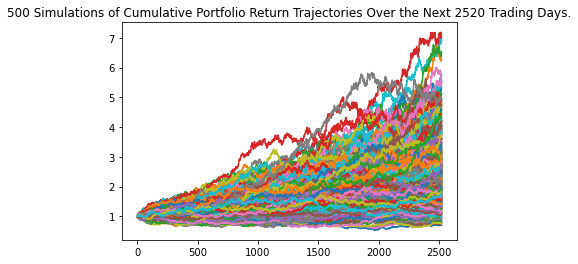

In [62]:
# Plot simulation outcomes
MC_forecast_10_yr.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

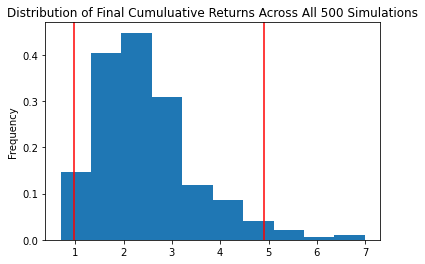

In [63]:
# Plot probability distribution and confidence intervals
MC_forecast_10_yr.plot_distribution()

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
forecast_10_yr_summary = MC_forecast_10_yr.summarize_cumulative_return()

# Print summary statistics
forecast_10_yr_summary

count           500.000000
mean              2.460879
std               1.027567
min               0.695624
25%               1.757087
50%               2.285195
75%               2.931512
max               6.993768
95% CI Lower      0.973076
95% CI Upper      4.913089
Name: 2520, dtype: float64

In [65]:
# Set initial investment
initial_investment_10yr = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(forecast_10_yr_summary[8] * initial_investment_10yr,2)
ci_upper_ten = round(forecast_10_yr_summary[9] * initial_investment_10yr,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10yr} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $58384.56 and $294785.32


# Final Analysis based on all scenarios 

In [66]:
#create a Dataframe for the summary of analysis 
# creating lists for the index , columns to hold the calculated variables 

columns = ["Initial Investment" , "95% Lower Confidence Level" , "95% Upper Confidence Level"]
index = ['30 Yr', '10 Yr' , '5 Yr']
#Data = {'30 Yr':[initial_investment , ci_lower , ci_upper], '10 Yr':[initial_investment_10yr , ci_lower_ten , ci_upper_five], '5 Yr':[initial_investment_5yr , ci_lower_five , ci_upper_five]}

Data = [[initial_investment , ci_lower , ci_upper],[initial_investment_10yr , ci_lower_ten , ci_upper_five],[initial_investment_5yr , ci_lower_five , ci_upper_five]]

summary_df = pd.DataFrame(data = Data , index = index , columns= columns)
summary_df



,Initial Investment,95% Lower Confidence Level,95% Upper Confidence Level
30 Yr,30000.0,81411.47,1327235.87
10 Yr,60000.0,58384.56,154063.70
5 Yr,60000.0,50726.07,154063.70
